Import Libraties

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_squared_error


# Load the data

In [ ]:
# Load the data
file_path = '/content/sample_data/CIB_synthetic_data (1).csv'
data = pd.read_csv(file_path)

#Objective: Understand the structure and summary of the dataset.

In [ ]:
# Checking the structure of the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      1895 non-null   int64  
 1   Date                1895 non-null   object 
 2   Client_ID           1895 non-null   int64  
 3   Account_Number      1895 non-null   int64  
 4   Transaction_Type    1895 non-null   object 
 5   Amount              1895 non-null   float64
 6   Currency            1895 non-null   object 
 7   Exchange_Rate       1895 non-null   float64
 8   Amount_in_USD       1895 non-null   float64
 9   Client_Sector       1895 non-null   object 
 10  Client_Industry     1895 non-null   object 
 11  Region              1895 non-null   object 
 12  Country             1895 non-null   object 
 13  City                1895 non-null   object 
 14  Branch_Code         1895 non-null   int64  
 15  Transaction_Status  1895 non-null   object 
 16  Employ

#Summary Statistics

In [ ]:
# Summary statistics of the dataset
data.describe()


Transaction_ID    Client_ID  Account_Number         Amount  \
count     1895.000000  1895.000000    1.895000e+03    1895.000000   
mean       948.000000  3019.664380    5.508427e+06  495076.099599   
std        547.183699  1140.252871    2.559043e+06  287197.266771   
min          1.000000  1001.000000    1.017297e+06    1030.690000   
25%        474.500000  2033.000000    3.365304e+06  251175.570000   
50%        948.000000  3027.000000    5.443778e+06  484688.860000   
75%       1421.500000  4017.500000    7.725863e+06  739227.860000   
max       1895.000000  4994.000000    9.998604e+06  998794.140000   

       Exchange_Rate  Amount_in_USD  Branch_Code  Employee_ID   Risk_Score  \
count    1895.000000   1.895000e+03  1895.000000  1895.000000  1895.000000   
mean        1.006625   4.965632e+05   559.812137   545.928232     0.494953   
std         0.288586   3.302668e+05   256.546050   257.898198     0.290530   
min         0.501600   6.798400e+02   100.000000   100.000000     0.000000   
25%         0.764850   2.298408e+05   337.000000   325.000000     0.244500   
50%         1.011600   4.515139e+05   571.000000   551.000000     0.489000   
75%         1.259650   7.126632e+05   779.500000   759.500000     0.744000   
max         1.499800   1.467382e+06   998.000000   999.000000     1.000000   

        Fraud_Flag  Interest_Rate  
count  1895.000000    1895.000000  
mean      0.499736       0.055118  
std       0.500132       0.025869  
min       0.000000       0.010000  
25%       0.000000       0.033000  
50%       0.000000       0.054000  
75%       1.000000       0.077000  
max       1.000000       0.100000

#Checking for Missing Values

In [ ]:
# Checking for missing values
data.isnull().sum()


Transaction_ID          0
Date                    0
Client_ID               0
Account_Number          0
Transaction_Type        0
Amount                  0
Currency                0
Exchange_Rate           0
Amount_in_USD           0
Client_Sector           0
Client_Industry         0
Region                  0
Country                 0
City                    0
Branch_Code             0
Transaction_Status      0
Employee_ID             0
Employee_Role           0
Risk_Score              0
Fraud_Flag              0
Approval_Status         0
Settlement_Date         0
Maturity_Date           0
Interest_Rate           0
Collateral_Type       451
Loan_Type               0
Purpose                 0
dtype: int64

#Unique Values in Categorical Columns

In [ ]:
# Unique values in categorical columns
data.select_dtypes(include=['object']).nunique()


Date                  1895
Transaction_Type         4
Currency                 4
Client_Sector            3
Client_Industry          4
Region                   4
Country                  4
City                     4
Transaction_Status       3
Employee_Role            4
Approval_Status          3
Settlement_Date       1895
Maturity_Date         1895
Collateral_Type          3
Loan_Type                4
Purpose                  4
dtype: int64

#Visualization
##Distribution of Fraud Flag

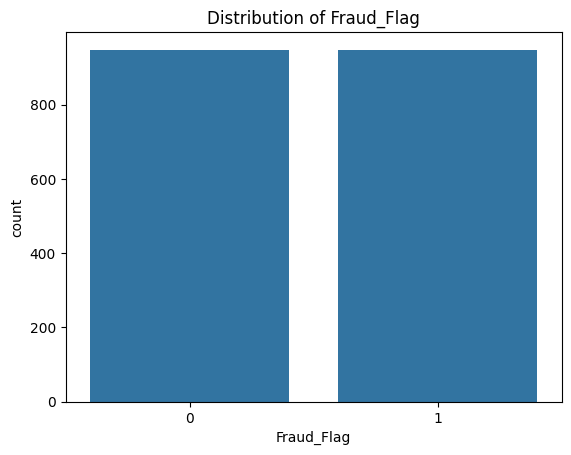

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the Fraud_Flag column
sns.countplot(data=data, x='Fraud_Flag')
plt.title('Distribution of Fraud_Flag')
plt.show()


#Correlation Heatmap

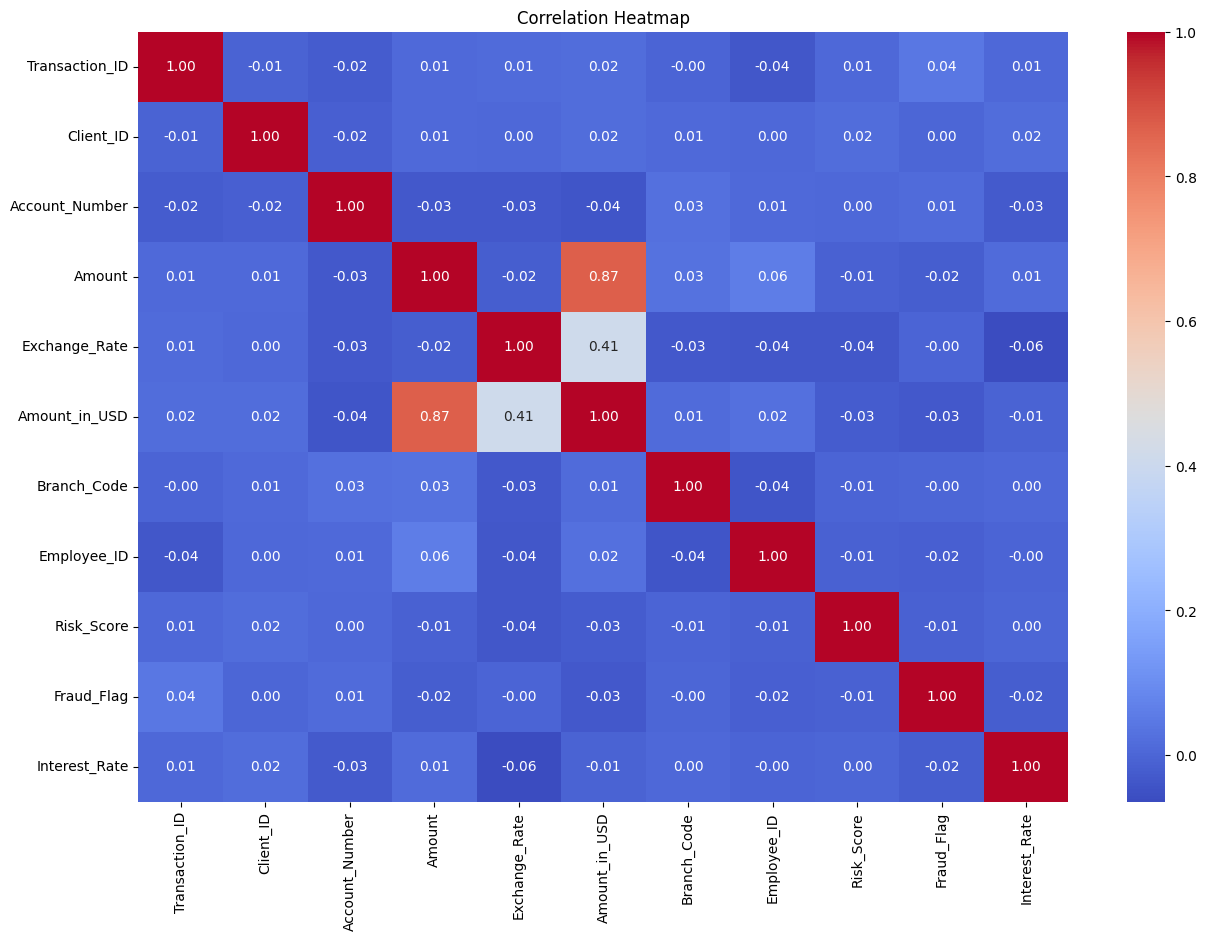

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Linear Regression Analysis (Why it doesn't work)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Predictions
y_pred_linreg = linreg.predict(X_test_scaled)

# Plotting Actual vs Predicted
plt.scatter(y_test, y_pred_linreg)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

# Mean Squared Error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linreg))


Mean Squared Error: 0.25066989810659634


#Logistic Regression
##Objective: Predict the Fraud_Flag using logistic regression.

###Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Selecting relevant features and target
features = data[['Amount_in_USD', 'Risk_Score', 'Interest_Rate']]
target = data['Fraud_Flag']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Model Training and Validation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Validation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:\n", roc_auc_score(y_test, y_pred_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51       190
           1       0.51      0.51      0.51       189

    accuracy                           0.51       379
   macro avg       0.51      0.51      0.51       379
weighted avg       0.51      0.51      0.51       379

Confusion Matrix:
 [[96 94]
 [92 97]]
ROC AUC Score:
 0.4981342244500139


#Prediction on New Data
##New Data Prediction

In [ ]:
# Assuming new_data is a DataFrame similar to features
new_data = pd.DataFrame({
    'Amount_in_USD': [100000, 200000],
    'Risk_Score': [0.5, 0.7],
    'Interest_Rate': [0.05, 0.08]
})

# Scaling new data
new_data_scaled = scaler.transform(new_data)

# Predictions
new_predictions = logreg.predict(new_data_scaled)
new_predictions


array([1, 1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      1895 non-null   int64  
 1   Date                1895 non-null   object 
 2   Client_ID           1895 non-null   int64  
 3   Account_Number      1895 non-null   int64  
 4   Transaction_Type    1895 non-null   object 
 5   Amount              1895 non-null   float64
 6   Currency            1895 non-null   object 
 7   Exchange_Rate       1895 non-null   float64
 8   Amount_in_USD       1895 non-null   float64
 9   Client_Sector       1895 non-null   object 
 10  Client_Industry     1895 non-null   object 
 11  Region              1895 non-null   object 
 12  Country             1895 non-null   object 
 13  City                1895 non-null   object 
 14  Branch_Code         1895 non-null   int64  
 15  Transaction_Status  1895 non-null   object 
 16  Employ

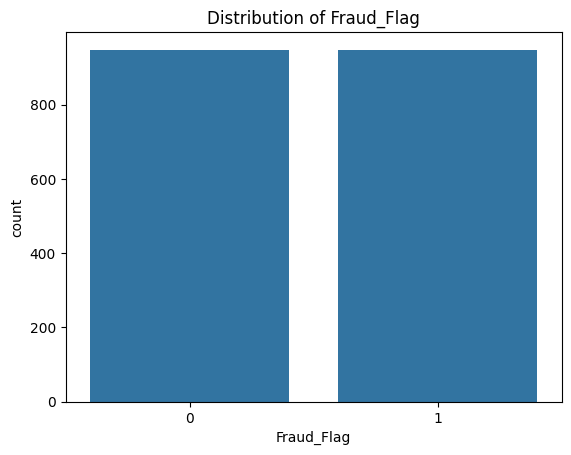

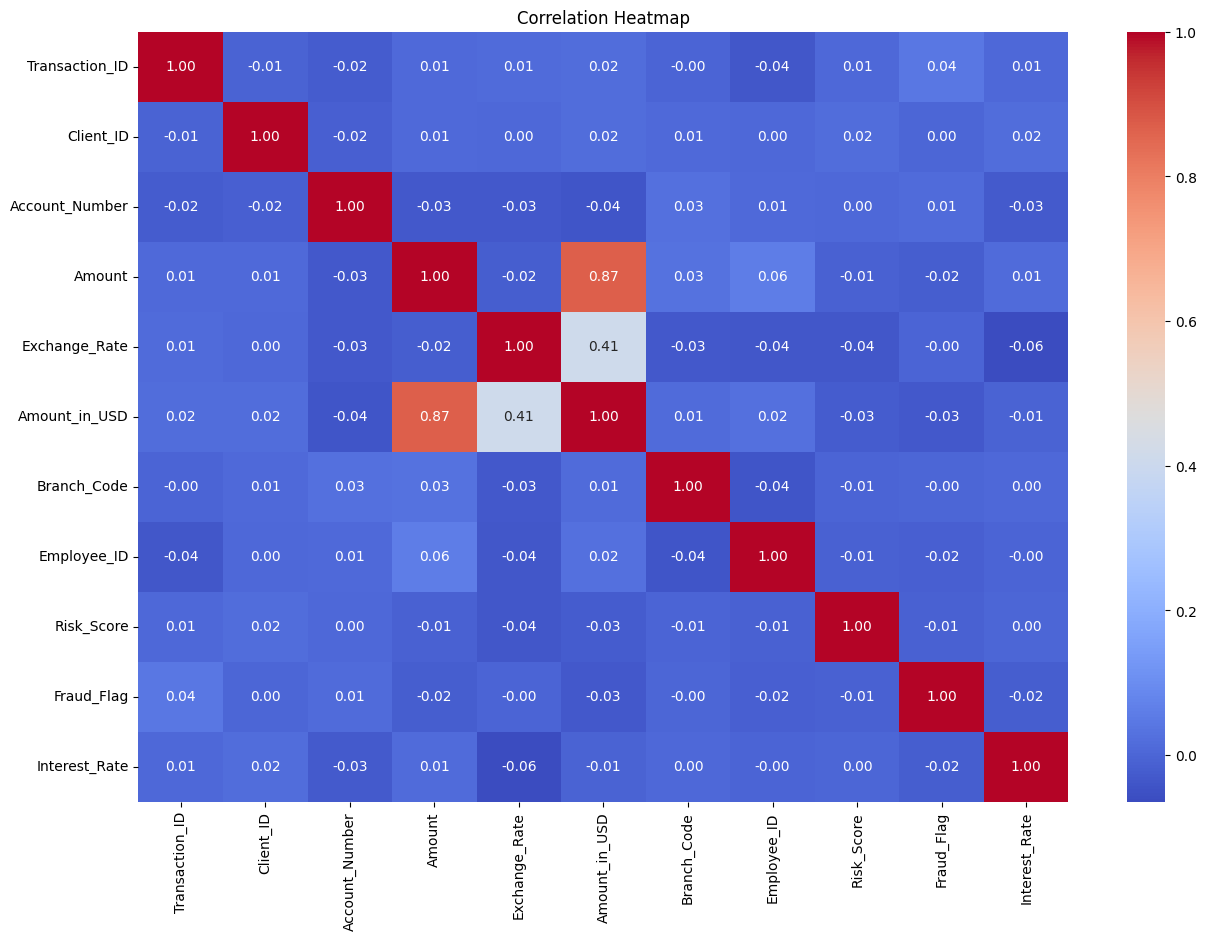

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.51      0.51       190
           1       0.51      0.51      0.51       189

    accuracy                           0.51       379
   macro avg       0.51      0.51      0.51       379
weighted avg       0.51      0.51      0.51       379

Confusion Matrix:
 [[96 94]
 [92 97]]
ROC AUC Score:
 0.4981342244500139


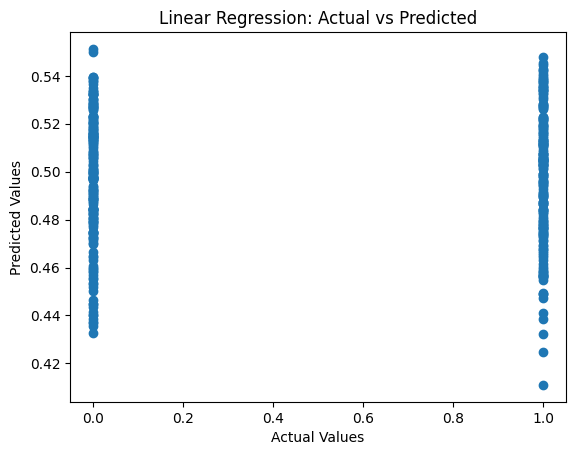

Mean Squared Error: 0.25066989810659634
[1 1]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, mean_squared_error

# Load the data
file_path = '/content/sample_data/CIB_synthetic_data (1).csv'
data = pd.read_csv(file_path)

# EDA
data.info()
print(data.describe())
print(data.isnull().sum())
print(data.select_dtypes(include=['object']).nunique())

# Visualization
sns.countplot(data=data, x='Fraud_Flag')
plt.title('Distribution of Fraud_Flag')
plt.show()

# Exclude non-numeric columns for the correlation heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(15,10))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Logistic Regression
features = data[['Amount_in_USD', 'Risk_Score', 'Interest_Rate']]
target = data['Fraud_Flag']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)
y_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:\n", roc_auc_score(y_test, y_pred_prob))

# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

y_pred_linreg = linreg.predict(X_test_scaled)

plt.scatter(y_test, y_pred_linreg)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted')
plt.show()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linreg))

# Prediction on New Data
new_data = pd.DataFrame({
    'Amount_in_USD': [100000, 200000],
    'Risk_Score': [0.5, 0.7],
    'Interest_Rate': [0.05, 0.08]
})

new_data_scaled = scaler.transform(new_data)

new_predictions = logreg.predict(new_data_scaled)
print(new_predictions)
